# NIST XCOM data
Visualizes the attenuation coefficient data from NIST XCOM.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(
    "../../data/xcomH2O.tsv",
    delimiter="\t",
    names=True,
)

E_keV = data["Energy"] * 1000.0
rho = 1.0  # g/cm^3 (water)
E_keV = data["Energy"] * 1000.0

mu_photo_cm1  = data["Photoelectric"]     * rho   # 1/cm
mu_comp_cm1   = data["Incoherent"]        * rho   # 1/cm  (Compton)
mu_total_cm1  = data["Total_w_Coherent"]  * rho   # 1/cm


In [22]:
def loglog_interp(x, xp, fp):
    x = np.asarray(x, dtype=float)
    return np.exp(np.interp(np.log(x), np.log(xp), np.log(fp)))

def make_mu_functions(E_keV, mu_photo_cm1, mu_comp_cm1, mu_total_cm1):
    # Ensure sorted
    idx = np.argsort(E_keV)
    E = E_keV[idx]
    p = mu_photo_cm1[idx]
    c = mu_comp_cm1[idx]
    t = mu_total_cm1[idx]

    def mu_photo(Ek):  return loglog_interp(Ek, E, p)
    def mu_compton(Ek):return loglog_interp(Ek, E, c)
    def mu_total(Ek):  return loglog_interp(Ek, E, t)

    return mu_photo, mu_compton, mu_total

mu_photo, mu_comp, mu_tot = make_mu_functions(E_keV, mu_photo_cm1, mu_comp_cm1, mu_total_cm1)


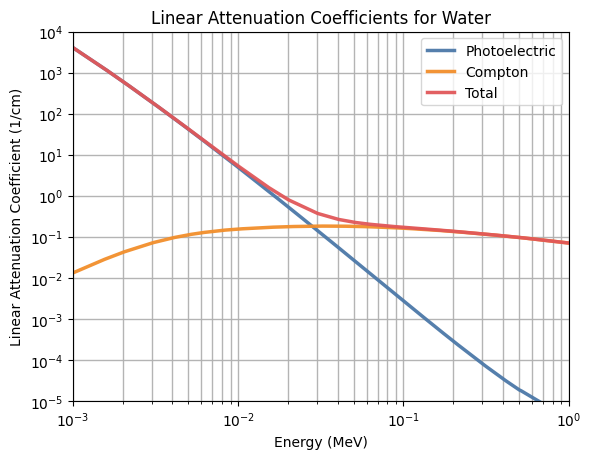

In [23]:
colors = ['#4c78a8', '#f28e2b', '#e15759']
alpha = 0.95
E_plot = np.logspace(0, 3, 20000)
plt.loglog(E_plot*1e-3, mu_photo(E_plot), label="Photoelectric",lw=2.5,alpha=alpha, color=colors[0])
plt.loglog(E_plot*1e-3, mu_comp(E_plot), label="Compton",lw=2.5,alpha=alpha, color=colors[1])
plt.loglog(E_plot*1e-3, mu_tot(E_plot), label="Total",lw=2.5,alpha=alpha, color=colors[2])
plt.xlabel("Energy (MeV)")
plt.ylabel("Linear Attenuation Coefficient (1/cm)")
plt.legend()
plt.title("Linear Attenuation Coefficients for Water")
plt.xlim(1e-3, 1e0)
plt.ylim(1e-5, 1e4)
plt.yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              ["$10^{-5}$", "$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$", "$10^{3}$", "$10^{4}$"])

plt.grid(which="both", ls="-",linewidth = 1.0, alpha=alpha)
plt.show()